In [2]:
# conda install pandas, matplotlib, seaborn

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns

# https://github.com/derekbanas/seaborn/blob/master/SB%20Tut.ipynb

%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

In [4]:
# create ndarray in np
arr = np.array([
    (20210601, 'ExchangeA', 0.50102, 0.52291),
    (20210602, 'ExchangeB', 0.48375, 0.68238),
    (20210603, 'ExchangeC', 0.56718, 0.54372),
    (20210604, 'ExchangeD', 0.24242, 0.23244),
    (20210605, 'ExchangeA', 0.24244, 0.32332)
],dtype=[
    ('Date', '<i4'), 
    ('Exchange', '<U10'),
    ('bid', '<f8'),
    ('ask', '<f8')
])
arr

array([(20210601, 'ExchangeA', 0.50102, 0.52291),
       (20210602, 'ExchangeB', 0.48375, 0.68238),
       (20210603, 'ExchangeC', 0.56718, 0.54372),
       (20210604, 'ExchangeD', 0.24242, 0.23244),
       (20210605, 'ExchangeA', 0.24244, 0.32332)],
      dtype=[('Date', '<i4'), ('Exchange', '<U10'), ('bid', '<f8'), ('ask', '<f8')])

In [5]:
df = pd.DataFrame(arr)
df

,Date,Exchange,bid,ask
0,20210601,ExchangeA,0.50102,0.52291
1,20210602,ExchangeB,0.48375,0.68238
2,20210603,ExchangeC,0.56718,0.54372
3,20210604,ExchangeD,0.24242,0.23244
4,20210605,ExchangeA,0.24244,0.32332


In [6]:
df.dtypes

Date          int32
Exchange     object
bid         float64
ask         float64
dtype: object

In [7]:
df.tail()
df.index
df.columns

Index(['Date', 'Exchange', 'bid', 'ask'], dtype='object')

In [8]:
# Viewing data
df.describe()
df.T
df.sort_index()
df.sort_values(by='Date')

,Date,Exchange,bid,ask
0,20210601,ExchangeA,0.50102,0.52291
1,20210602,ExchangeB,0.48375,0.68238
2,20210603,ExchangeC,0.56718,0.54372
3,20210604,ExchangeD,0.24242,0.23244
4,20210605,ExchangeA,0.24244,0.32332


In [9]:
# Selection by col
df['Date']
#Selection by row
df[2:5:1]

# select row
df.loc[0]
# select col # inclusive!!!!!
df.loc[0:3, ['Date']] # returns a dataframe
df.loc[0, ['Date']] # returns a series
df.loc[0, 'Date'] # returns an int
df.at[0, 'bid']

df.iloc[0:3:1, 0:2]
df.iloc[[0, 1, 2], [0, 1]]

,Date,Exchange
0,20210601,ExchangeA
1,20210602,ExchangeB
2,20210603,ExchangeC


In [10]:
# Boolean indexing

# Row selecting
df[df["Date"] > 20210602] # return rows satisfying condition 
df[df.loc[:, ['bid', 'ask']] > 0.24] # return entire df with NaN in places where condition is not satisfied
df[df['Exchange'].isin(['ExchangeA', 'ExchangeB'])] # return rows satisfying condition 
df[df.loc[:, 'bid'] > 0.4]
df[df.iloc[:, 2] > 0.4]

# if condition is filter one column
df[df.loc[:, 'bid'] > 0.3] # return satisfying rows
df[df.loc[:, ['bid', 'ask']] > 0.3] # return entire df

,Date,Exchange,bid,ask
0,NaN,NaN,0.50102,0.52291
1,NaN,NaN,0.48375,0.68238
2,NaN,NaN,0.56718,0.54372
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.32332


In [11]:
# Setting

new_col = ['trader1', 'trader2', 'trader3', 'trader4', 'trader5']
df['Trader'] = new_col
df.at[0, 'Trader'] = 'trader0'
df.iat[0, 2]
df.loc[0, 'Trader'] = 'trader1'
df.loc[:, 'Trader'] = ['trader{id}'.format(id = i) for i in range(1, len(df) + 1)]
df.reindex(columns=list(df.columns) + ['Note'])
temp = df.copy()
temp['ask'] = -temp['ask']
temp

,Date,Exchange,bid,ask,Trader
0,20210601,ExchangeA,0.50102,-0.52291,trader1
1,20210602,ExchangeB,0.48375,-0.68238,trader2
2,20210603,ExchangeC,0.56718,-0.54372,trader3
3,20210604,ExchangeD,0.24242,-0.23244,trader4
4,20210605,ExchangeA,0.24244,-0.32332,trader5


In [12]:
df2 = df.reindex(columns=list(df.columns) + ['Note'])
# df2.fillna(value='na')
# df2.dropna(how="any")
bool_mask = pd.isna(df2)
bool_mask

,Date,Exchange,bid,ask,Trader,Note
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True


In [13]:
# Operations

# df['mean'] = df.iloc[:, 2:-1].mean(axis=1)
df['Date'].shift(2)
df['ask'] = df['ask'].sub(df['bid'])
df['ask'].value_counts()

ask
 0.02189    1
 0.19863    1
-0.02346    1
-0.00998    1
 0.08088    1
Name: count, dtype: int64

In [14]:
# User defined functions
df.loc[:, ['ask', 'bid']].agg(lambda x: np.mean(x))
df['ask'].transform(lambda x : x + 5)

0    5.02189
1    5.19863
2    4.97654
3    4.99002
4    5.08088
Name: ask, dtype: float64

In [15]:
# Merge
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
df = pd.concat(pieces)
df = pd.concat([df, pd.DataFrame()])
df

,0,1,2,3
0,-0.983002,-1.649366,-1.871043,0.451945
1,-0.986917,-1.543384,-1.081798,-1.749123
2,1.195569,0.404252,1.724569,-1.822684
3,2.503565,-2.942470,-1.169718,-1.328830
4,-0.788597,1.015340,0.531876,-0.075964
5,1.674889,-1.069277,-0.297519,0.255637
6,-0.296037,0.275034,-0.525543,-0.759368
7,1.993518,-1.188534,-1.014241,0.606345
8,0.535414,-0.536597,-0.524590,0.496428
9,0.136431,0.243368,1.986647,1.461058


In [16]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [22]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df.groupby('A')[['C', 'D']].apply(lambda x : x)
#df['D'].rename('ask')

C         D
A                        
bar 1 -1.348511  0.841284
    3 -1.372762 -1.806489
    5 -0.573413 -1.386547
foo 0  0.399110  0.671482
    2 -0.204912 -1.722049
    4  0.638813 -1.256969
    6 -0.535245 -0.486032
    7  0.437260 -0.045403

In [18]:
df.query('A == \'foo\'').assign(mid_price=lambda x : (x['C'] + x ['D']) / 2)

,A,B,C,D,mid_price
0,foo,one,0.667233,1.172158,0.919696
2,foo,two,-0.482581,-1.266018,-0.874299
4,foo,two,0.542493,0.185856,0.364174
6,foo,one,-0.224208,0.055055,-0.084576
7,foo,three,-0.189360,0.240928,0.025784


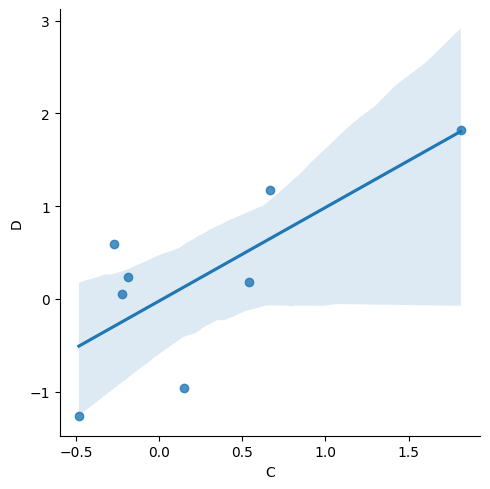

In [20]:
#sns.set_theme(style="ticks")
sns.lmplot(data=df, x='C', y='D')